In [1]:
import os
import pickle
from datetime import datetime, timezone
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors
import numpy as np

import xarray as xr
import xroms
import matplotlib.pyplot as plt
from wavespectra import read_ww3, read_swan, read_ndbc, read_netcdf
from wavespectra.input.swan import read_swans

# include my wave stats functions
%run -i wave_stats.py

# include my radial plotting functions
%run -i spec_plot_funcs.py

In [2]:
# Read selected drifters
# Code from Jake Davis, UW
DATA_DIRECTORY = '/vortexfs1/home/csherwood/proj/NOPP_Lee'
DATA_FILENAME = 'hurricane_lee_drifter_data_v0.pickle'
with open(os.path.join(DATA_DIRECTORY, DATA_FILENAME), 'rb') as handle:
    drifters = pickle.load(handle)

In [3]:
# `drifters` is a python dictionary keyed by drifter type (spotter,
# dwsd, or microswift)
spotter = drifters['spotter']
# `spotter` is a python dictionary of Pandas DataFrames, keyed by
# each drifter ID. The drifter ids can then be accessed as follows:
spotter_ids = list(spotter.keys())

# The data for a single id (e.g. the first) can be accessed as:
spotter_id = spotter_ids[0]

# index zero is 31232C
print(spotter_id)
# spotter[spotter_id].info()

# time intervals are tuned to select only one record near noon on 9/16
start_date = datetime(2023, 9, 16, 11, 30, tzinfo=timezone.utc)
end_date = datetime(2023, 9, 16, 12, 30, tzinfo=timezone.utc)
only_waves = spotter[spotter_id]['energy_density'].notnull()
dss = spotter[spotter_id][only_waves][start_date:end_date]
dss

SPOT-31232C


,latitude,longitude,significant_height,peak_period,peak_direction,peak_directional_spread,mean_period,mean_direction,mean_directional_spread,frequency,energy_density,a1,b1,a2,b2,wave_check_factor,sea_surface_temperature,sea_level_pressure
time,,,,,,,,,,,,,,,,,,
2023-09-16 11:45:00+00:00,42.86922,-69.75373,4.85,8.533,27.06,35.31149,7.709045,26.035342,45.375049,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.040504319999999996, 0.12828672, 0.742680576...","[-0.037146, -0.045943, -0.194526, -0.489736, -...","[-0.376344, -0.466276, -0.13392, 0.182796, 0.2...","[-0.362659, -0.42131, -0.391984, -0.166178, 0....","[0.018573, 0.040078, -0.000978, -0.206256, -0....",NaN,18.74,997.4


In [4]:
dwsd = drifters['dwsd']
dwsd_ids = list(dwsd.keys())
start_date = datetime(2023, 9, 16, 11, 50, tzinfo=timezone.utc)
end_date = datetime(2023, 9, 16, 12, 10, tzinfo=timezone.utc)
dwsd_id = dwsd_ids[1]
dsd = dwsd[dwsd_id][start_date:end_date]
print(dwsd_id)
dsd

300534061901630


,latitude,longitude,significant_height,peak_period,peak_direction,peak_directional_spread,mean_period,mean_direction,mean_directional_spread,frequency,energy_density,a1,b1,a2,b2,wave_check_factor,sea_surface_temperature,sea_level_pressure
time,,,,,,,,,,,,,,,,,,
2023-09-16 12:00:00+00:00,41.520939,-69.702394,4.66,10,31.8,19.015568,7.443817,23.655941,46.325156,"[0.03125, 0.03515625, 0.0390625, 0.04296875, 0...","[0.3997, 0.3609, 0.27, 0.2753, 0.7186, 0.8472,...","[0.1865, 0.3786, -0.33, -0.1058, -0.458, -0.46...","[0.3009, 0.2181, 0.0486, -0.0402, -0.0062, 0.0...","[-0.0083, 0.7181, -0.014, 0.085, 0.0167, 0.053...","[0.3582, 0.0146, -0.0571, -0.4075, -0.0115, 0....",NaN,17.11,NaN


In [5]:
dwms = drifters['microswift']
dwms_ids = list(dwms.keys())
# we are looking for microswift 065
print(dwms_ids)
print(dwms_ids[3])
start_date = datetime(2023, 9, 16, 11, 50, tzinfo=timezone.utc)
end_date = datetime(2023, 9, 16, 13, tzinfo=timezone.utc)
dwms_id = dwms_ids[3]
dsm = dwms[dwms_id][start_date:end_date]
dsm

['041', '050', '059', '065']
065


,latitude,longitude,significant_height,peak_period,peak_direction,peak_directional_spread,mean_period,mean_direction,mean_directional_spread,frequency,energy_density,a1,b1,a2,b2,wave_check_factor,sea_surface_temperature,sea_level_pressure
time,,,,,,,,,,,,,,,,,,
2023-09-16 12:35:12+00:00,42.320221,-70.02636,3.964844,9.664062,46.735705,20.846626,7.969647,22.777554,46.929629,"[0.009765625, 0.021484375, 0.033203125, 0.0449...","[0.74560546875, 0.96923828125, 1.3427734375, 1...","[-0.17, 0.15, 0.08, -0.01, -0.37, -0.73, -0.87...","[-0.07, -0.19, -0.21, -0.37, -0.2, 0.03, -0.07...","[0.11, -0.32, -0.23, -0.33, -0.23, 0.44, 0.68,...","[-0.18, -0.18, -0.23, -0.01, -0.1, -0.22, 0.06...","[0.1, 0.1, 0.1, 0.1, 0.3, 0.8, 1.2, 1.1, 1.0, ...",NaN,NaN


In [6]:
MODEL_DIRECTORY = '/proj/usgs-share/Projects/NOPP_forecast/Lee/'

swan_list = ['/proj/usgs-share/Projects/NOPP_forecast/Lee/dwsd630_2Dspec.txt',
'/proj/usgs-share/Projects/NOPP_forecast/Lee/n44098_2Dspec.txt',
'/proj/usgs-share/Projects/NOPP_forecast/Lee/s31232_2Dspec.txt',
'/proj/usgs-share/Projects/NOPP_forecast/Lee/sw065_2Dspec.txt']

In [7]:
def swan_stats( fn, tid = 24 ):
    # Read ASCII SWAN file and return statistics for time index = tid
    # uses wavespectra
    df = read_swan( fn ).isel(time=tid)
    f = df['freq']
    dirs = df['dir']
    efth = np.squeeze( df.efth )
    stats = df.efth.spec.stats(["hs", "tp", "tm01", "tm02", "dpm", "dm", "dspr", "swe"])
    Hs = np.array( np.squeeze( stats['hs'] ) )
    Tp = np.array( np.squeeze( stats['tp'] ) )
    Dp = np.array( np.squeeze( stats['dpm'] ) )
    Dsprd = np.array( np.squeeze( stats[ 'dspr' ]) )
    S = integrate_in_direction( efth, 10., daxis=1)
    hs2 = calc_Hs_1d( S,f )
    sigf = calc_sigmaf_1d( S, f )
    print('Hs = {:.2f}\nHs2 = {:.2f}\nTp = {:.2f}\nsigf = {:.2f}\nDp = {:.2f}\nDsprd = {:.2f}\n'.
          format(Hs, hs2, Tp, sigf, Dp, Dsprd))
    return Hs, Tp, sigf, Dp, Dsprd 


def drifter_stats( dss ):
    # Read pickled drifter file and return statistics for time index = tid
    f = np.array( dss['frequency'][0] )
    S = np.array( dss['energy_density'][0] )
    Hs = np.array( dss['significant_height'][0] )
    Tp = np.array( dss['peak_period'][0])
    Dp = np.array( dss['peak_direction'][0] )
    Dsprd =  np.array( dss['peak_directional_spread'][0] )
    hs2 = calc_Hs_1d( S,f )
    sigf = calc_sigmaf_1d( S, f )
    print('Hs = {:.2f}\nHs2 = {:.2f}\nTp = {:.2f}\nsigf = {:.2f}\nDp = {:.2f}\nDsprd = {:.2f}\n'.
          format(Hs, hs2, Tp, sigf, Dp, Dsprd))
    return Hs, Tp, sigf, Dp, Dsprd

Hs = 4.85
Hs2 = 4.85
Tp = 8.53
sigf = 0.09
Dp = 27.06
Dsprd = 35.31

Hs = 5.80
Hs2 = 5.80
Tp = 8.79
sigf = 0.14
Dp = 28.89
Dsprd = 50.30

[20.         10.          5.          3.33333333  2.5       ]


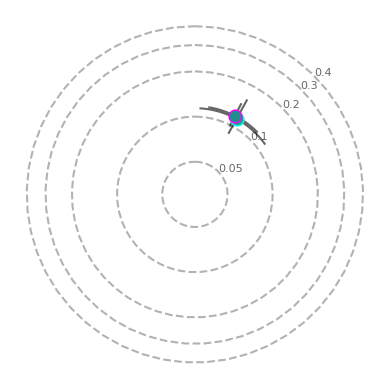

In [8]:
# Statistics for Spotter 31232 data
Hss, Tps, sigfs, Dps, Dsprds = drifter_stats( dss )
# Statistics for SWAN output
Hs, Tp, sigf, Dp, Dsprd = swan_stats( swan_list[2] )

# try plots for log radius rings
radii_f=[0.05, 0.1, 0.2, 0.3, 0.4] 
print( 1./ np.array( radii_f ) )

x0 = 0.
y0 = 0.
    
fig = plt.figure( )
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# frequency rings
for f in np.array( radii_f ):
    r = logr( f )
    circle(ax, x0, y0, r, zorder=0)

# label rings
for i in np.array(radii_f):
    ptext(ax, x0, y0, logr(i), 45, "{}".format(i) )
ax.axis('off')

plt_rdata(ax, x0, y0, Hs, Tp, sigf, Dp, Dsprd, ec='cyan')
plt_rdata(ax, x0, y0, Hss, Tps, sigfs, Dps, Dsprds, ec='magenta')
plt.savefig('spotter31232.png', dpi=200, bbox_inches='tight')

Hs = 4.66
Hs2 = 4.66
Tp = 10.00
sigf = 0.12
Dp = 31.80
Dsprd = 19.02

Hs = 7.69
Hs2 = 7.69
Tp = 13.92
sigf = 0.07
Dp = 57.56
Dsprd = 30.24



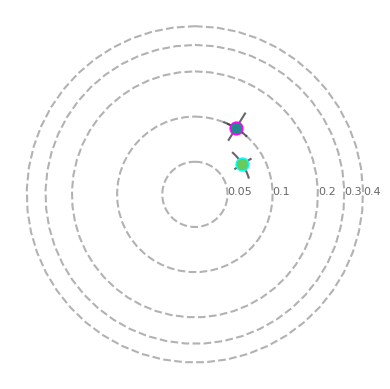

In [9]:
# Statistics for DWSD 630 data
Hsd, Tpd, sigfd, Dpd, Dsprdd = drifter_stats( dsd )
# Statistics for SWAN output
Hs, Tp, sigf, Dp, Dsprd = swan_stats( swan_list[0] )

fig = plt.figure( )
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# frequency rings
for f in np.array( radii_f ):
    r = logr( f )
    circle(ax, x0, y0, r, zorder=0)

# label rings
for i in np.array(radii_f):
    ptext(ax, x0, y0, logr(i), 90, "{}".format(i) )
ax.axis('off')

plt_rdata(ax, x0, y0, Hs, Tp, sigf, Dp, Dsprd, ec='cyan')
plt_rdata(ax, x0, y0, Hsd, Tpd, sigfd, Dpd, Dsprdd, ec='magenta')
plt.savefig('dwsd630.png', dpi=200, bbox_inches='tight')

Hs = 3.96
Hs2 = 4.06
Tp = 9.66
sigf = 0.12
Dp = 46.74
Dsprd = 20.85

Hs = 5.75
Hs2 = 5.75
Tp = 9.81
sigf = 0.13
Dp = 43.43
Dsprd = 42.72



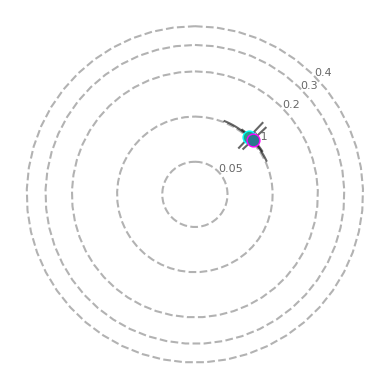

In [10]:
# Statistics for microswift 63
Hsm, Tpm, sigfm, Dpm, Dsprdm = drifter_stats( dsm )
# Statistics for SWAN output
Hs, Tp, sigf, Dp, Dsprd = swan_stats( swan_list[3] )

fig = plt.figure( )
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# frequency rings
for f in np.array( radii_f ):
    r = logr( f )
    circle(ax, x0, y0, r, zorder=0)

# label rings
for i in np.array(radii_f):
    ptext(ax, x0, y0, logr(i), 45, "{}".format(i) )
ax.axis('off')

plt_rdata(ax, x0, y0, Hs, Tp, sigf, Dp, Dsprd, ec='cyan')
plt_rdata(ax, x0, y0, Hsm, Tpm, sigfm, Dpm, Dsprdm, ec='magenta')
plt.savefig('microswift63.png', dpi=200, bbox_inches='tight')